In [1]:
import numpy as np
import pandas as pd
import investpy
import matplotlib.pyplot as plt
import pickle 
from functools import reduce
import pickle
import datetime

In [ ]:

# Euro from https://www.ecb.europa.eu/stats/financial_markets_and_interest_rates/euro_area_yield_curves/html/index.en.html




# Code for scraping

In [165]:
IS2Y = investpy.bonds.get_bond_historical_data(bond='argentina 1Y',
                                               from_date='01/01/2010',
                                               to_date='31/12/2023')


ConnectionError: ERR#0015: error 403, try again later.

In [1]:

import requests                       # for "get" request to API
import pandas as pd                   # working with data frames
from bs4 import BeautifulSoup         # for web scraping and parsing HTML
from fake_useragent import UserAgent

In [3]:
user_agent = UserAgent()
head = {
    "User-Agent":user_agent.random,
    "X-Requested-With": "XMLHttpRequest",
    "Accept": "text/html",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
}

url = "https://www.investing.com/instruments/HistoricalDataAjax"
req = requests.post(url, headers=head)
req.status_code

403

In [13]:
# create an instance of the class UserAgent
user_agent = UserAgent()
 
headers = {
    "User-Agent": user_agent.random
}
 # Par yield curve rates
res = requests.get("https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2023", headers=headers)
 
html = BeautifulSoup(res.text, "lxml")

list_of_tag_years = html.find("select", {"data-drupal-selector": "edit-field-tdr-date-value"}).find_all("option")
list_years = [tag.text for tag in list_of_tag_years[1:len(list_of_tag_years) - 1]]


link = html.find("div", {"class": "csv-feed views-data-export-feed"}).find("a").get("href")



	
df_list = []
 
for year in list_years:
    print(year)
    response = requests.get(link.replace("2023", year)).text.split("\n")
 
    list_table = [[*row.split(",")] for row in response[1:]]
 
    df = pd.DataFrame(list_table, columns=response[0].split(","))
    df.columns = df.columns.str.strip('"')
    df_list.append(df)


	
df_all = pd.concat(df_list)

2023
2022
2021
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1992
1991
1990


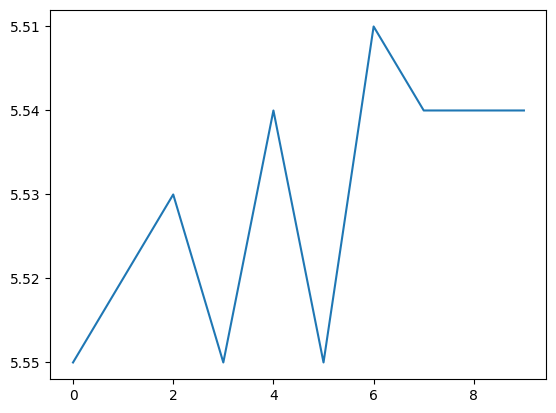

In [26]:
plt.plot(df_all.iloc[:10,1])

In [27]:
with open(f'./yc/US.pkl', 'wb') as handle:
    pickle.dump(df_all, handle, protocol=pickle.HIGHEST_PROTOCOL)

UK MUNGE https://www.bankofengland.co.uk/statistics/yield-curves

In [35]:
uk_2015 = pd.read_excel("yc/GLC Nominal month end data_1970 to 2015.xlsx", sheet_name = 4, skiprows = 3)
uk_2015.head()

,years:,0.5,1,1.5,2,2.5,3,3.5,4,4.5,...,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-31,NaN,8.635354,8.707430,8.700727,8.664049,8.618702,8.572477,8.528372,8.487617,...,8.870700,8.925363,8.982115,9.040916,9.101725,9.164502,9.229205,9.295793,9.364219,9.434411
2,1970-02-28,NaN,8.413131,8.397269,8.370748,8.337633,8.301590,8.265403,8.230804,8.198713,...,8.565782,8.609622,8.654802,8.701268,8.748968,8.797850,8.847861,8.898948,8.951060,9.004148
3,1970-03-31,NaN,7.744187,7.782761,7.795017,7.793104,7.784963,7.775288,7.766459,7.759564,...,8.637118,8.690039,8.744041,8.799085,8.855131,8.912143,8.970080,9.028905,9.088579,9.149062
4,1970-04-30,NaN,7.606512,7.864352,7.973522,8.002442,7.992813,7.967524,7.938335,7.911422,...,9.650134,9.750003,9.850868,9.952589,10.055023,10.158032,10.261473,10.365213,10.469157,10.573264


In [36]:
uk_2016 = pd.read_excel("yc/GLC Nominal month end data_2016 to present.xlsx", sheet_name = 4, skiprows = 3)
uk_2016.head()

,years:,0.5,1,1.5,2,2.5,3,3.5,4,4.5,...,35.5,36,36.5,37,37.5,38,38.5,39,39.5,40
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-31,NaN,0.244401,0.261230,0.343575,0.448479,0.558078,0.665545,0.768346,0.865648,...,2.313911,2.302217,2.290826,2.279791,2.269156,2.258962,2.249244,2.240031,2.231350,2.223221
2,2016-02-29,NaN,0.247750,0.221971,0.251252,0.307149,0.376114,0.451709,0.530537,0.610655,...,2.283594,2.271275,2.259188,2.247392,2.235940,2.224879,2.214250,2.204090,2.194430,2.185296
3,2016-03-31,0.398924,0.317599,0.304726,0.341113,0.403295,0.478072,0.558702,0.641520,0.724463,...,2.235573,2.222826,2.210364,2.198248,2.186530,2.175260,2.164480,2.154227,2.144532,2.135423
4,2016-04-30,0.403396,0.377009,0.394922,0.451475,0.527891,0.613297,0.702283,0.792029,0.881014,...,2.329159,2.315942,2.303054,2.290554,2.278498,2.266932,2.255899,2.245434,2.235568,2.226326


In [40]:
uk_all = pd.concat((uk_2015, uk_2016))
with open(f'./yc/UK.pkl', 'wb') as handle:
    pickle.dump(uk_all, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
uk_2015 = pd.read_xlsx("")

# Code to merge bonds

In [17]:
mp_df = pd.read_csv('yc/' + 'SW2Y' + ".csv")
mp_df.tail()

,Date,Price,Open,High,Low,Change %
4995,02/04/2000,2.885,2.885,2.885,2.885,0.91%
4996,02/03/2000,2.859,2.859,2.859,2.859,3.06%
4997,02/02/2000,2.774,2.774,2.774,2.774,-0.14%
4998,02/01/2000,2.778,2.778,2.778,2.778,0.14%
4999,01/31/2000,2.774,2.774,2.774,2.774,1.54%


In [18]:
bonds = ['AU2Y', 'BRZ2Y', 'China2Y', 'DK2Y', 'FR2Y', 'GRM2Y', 'IS2Y', 'JP2Y', 'RS2Y', 'UK2Y', 'US2Y', 'Turkey2Y', 'SW2Y', 'SP2Y']


df_list = []
for bond in bonds:
    tmp_df = pd.read_csv('yc/' + bond + ".csv")
    tmp_df.index = pd.to_datetime(tmp_df.iloc[:,0])
    tmp_df = pd.DataFrame({bond:tmp_df['Price']}, index = tmp_df.index)
    #tmp_df.rename(columns = {'price':bond})
    df_list.append(tmp_df)

df_bonds = reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how = 'left'), df_list)

<Axes: xlabel='Date'>

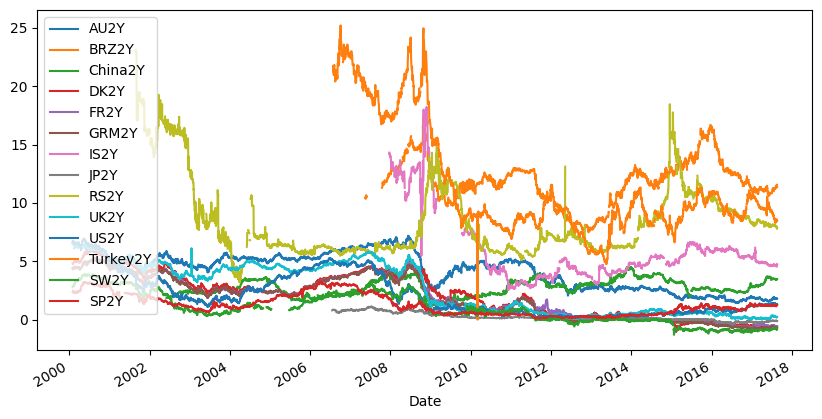

In [19]:
fig, ax = plt.subplots(figsize = (10,5))
df_bonds.plot(ax = ax)

In [102]:
df_bonds

,AU2Y,BRZ2Y,China2Y,DK2Y,FR2Y,GRM2Y,IS2Y,JP2Y,RS2Y,UK2Y,US2Y,Turkey2Y,SW2Y,SP2Y
Date,,,,,,,,,,,,,,
2017-08-18,1.807,8.480,3.463,-0.596,-0.553,-0.705,4.731,-0.125,7.81,0.234,1.314,11.37,-0.817,1.251
2017-08-17,1.834,8.530,3.455,-0.594,-0.544,-0.701,4.738,-0.114,7.77,0.226,1.302,11.42,-0.811,1.273
2017-08-16,1.834,8.470,3.463,-0.596,-0.578,-0.711,4.778,-0.113,7.81,0.233,1.330,11.56,-0.810,1.253
2017-08-15,1.814,8.475,3.469,-0.587,-0.563,-0.710,4.728,-0.112,7.85,0.230,1.350,11.46,-0.815,1.221
2017-08-14,1.798,8.495,3.463,-0.593,-0.577,-0.717,4.571,-0.108,7.90,0.219,1.326,11.43,-0.836,1.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-02-04,6.670,NaN,NaN,4.832,4.344,4.397,NaN,NaN,NaN,6.444,6.630,NaN,2.885,2.447
2000-02-03,6.760,NaN,NaN,4.785,4.388,4.310,NaN,NaN,NaN,6.434,6.527,NaN,2.859,2.445
2000-02-02,6.750,NaN,NaN,4.755,4.371,4.338,NaN,NaN,NaN,6.465,6.596,NaN,2.774,2.393


# Code to download features

In [14]:
import yfinance as yf

start_date= "2000-01-01"
end_date="2023-08-01"

In [205]:
currencies = ['EUR', 'USD', 'GBP', 'CHF', 'AUD', 'TRY', 'DKK', 'SGD', 'RUB' ,'ISK']
currency_tickers = []
for cur1 in range(len(currencies)):
    for cur2 in range(cur1+1,len(currencies)):
        currency_tickers.append(currencies[cur1] +currencies[cur2]+ "=X" )


currency = yf.download(currency_tickers, start_date , end_date)

[*********************100%***********************]  45 of 45 completed

10 Failed downloads:
- DKKRUB=X: No timezone found, symbol may be delisted
- RUBISK=X: No timezone found, symbol may be delisted
- TRYISK=X: No timezone found, symbol may be delisted
- CHFRUB=X: No data found for this date range, symbol may be delisted
- AUDTRY=X: No data found for this date range, symbol may be delisted
- SGDISK=X: No timezone found, symbol may be delisted
- AUDRUB=X: No data found for this date range, symbol may be delisted
- AUDISK=X: No data found for this date range, symbol may be delisted
- TRYRUB=X: No timezone found, symbol may be delisted
- SGDRUB=X: No data found for this date range, symbol may be delisted


In [206]:
with open(f'yc/currencies.pkl', 'wb') as handle:
    pickle.dump(currency, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
gold = yf.download(['GC=F'], start_date , end_date)
crude_oil = yf.download(['CL=F'], start_date , end_date)
snp500futures =  yf.download(['ES=F'], start_date , end_date)
silver =  yf.download(['SI=F'], start_date , end_date)
nikkei=  yf.download(['^N225'], start_date , end_date)
ftse=  yf.download(['^FTSE'], start_date , end_date)
DJfutures=  yf.download(['YM=F'], start_date , end_date)
nasdaqfutures=  yf.download(['NQ=F'], start_date , end_date)
russelfutures = yf.download(['RTY=F'], start_date , end_date)
euronext = yf.download(['^N100'], start_date , end_date)
russiaindex = yf.download(['IMOEX.ME'], start_date , end_date)
singaporeindex = yf.download(['^STI'], start_date , end_date)
chinaindex = yf.download(['000001.SS'], start_date , end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:


start_date= "2000-01-01"
end_date="2023-08-01"
dates=pd.date_range(start_date, end_date, freq='d')
date_df= pd.DataFrame(index = dates)

def rem_time(d):
    return datetime.datetime(d.year, d.month, d.day)
various_list = [gold, crude_oil, snp500futures,  silver, nikkei, ftse, DJfutures, nasdaqfutures, russelfutures, euronext, russiaindex, singaporeindex, chinaindex ]
names = ['gold', 'crude_oil', 'snp500futures', 'silver', 'nikkei', 'ftse', 'DJfutures', 'nasdaqfutures', 'russelfutures', 'euronext', 'russiaindex', 'singaporeindex', 'chinaindex']
df_list = []
for i in range(len(various_list)):
    tmp_df = various_list[i]
    tmp_df.index = [rem_time(d) for d in tmp_df.index]
    tmp_df = pd.merge(date_df, tmp_df, right_index = True, left_index = True, how = 'left')
    tmp_df = pd.DataFrame({names[i]:tmp_df['Adj Close']}, index = tmp_df.index)
    df_list.append(tmp_df.interpolate())
    


various = reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how = 'left'), df_list)

with open(f'yc/various_index.pkl', 'wb') as handle:
    pickle.dump(various, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [194]:

date_df= pd.DataFrame(index = dates)

vix =  yf.download(['^VIX'], start_date , end_date)
japanvix = pd.read_csv('yc/' + 'japanvix' + ".csv")
japanvix.index = pd.to_datetime(japanvix.iloc[:,0])
japanvix = pd.DataFrame({'japanvix':japanvix['Price']}, index = japanvix.index)
japanvix = pd.merge(date_df, japanvix, right_index = True, left_index = True, how = 'left')

usvix = pd.DataFrame({'usvix':vix['Adj Close']}, index = vix.index)
usvix = pd.merge(date_df, usvix, right_index = True, left_index = True, how = 'left')

eurovix = pd.read_csv('yc/' + 'eurivx' + ".csv")
eurovix.index = pd.to_datetime(eurovix.iloc[:,0])
eurovix = pd.DataFrame({'eurovix':eurovix['Price']}, index = eurovix.index)
eurovix = pd.merge(date_df, eurovix, right_index = True, left_index = True, how = 'left')


russiavix = pd.read_csv('yc/' + 'russiavix' + ".csv")
russiavix.index = pd.to_datetime(russiavix.iloc[:,0])
russiavix = pd.DataFrame({'russiavix':russiavix['Price']}, index = russiavix.index)
russiavix = pd.merge(date_df, russiavix, right_index = True, left_index = True, how = 'left')

vix_indexes = reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how = 'left'), [usvix, japanvix, eurovix, russiavix])
vix_indexes = vix_indexes.interpolate()
with open(f'yc/vixs.pkl', 'wb') as handle:
    pickle.dump(vix_indexes, handle, protocol=pickle.HIGHEST_PROTOCOL)

[*********************100%***********************]  1 of 1 completed


In [79]:
    hcpi_q = pd.read_excel("yc/Inflation-data.xlsx", sheet_name = 'hcpi_m')
    hcpi_q.index = name + hcpi_q['Country'] 

,197001,197002,197003,197004,197005,197006,197007,197008,197009,197010,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
Country,,,,,,,,,,,,,,,,,,,,,
def_mAruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
def_mAfghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
def_mAngola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,676.991486,687.567874,695.269127,701.686838,707.591132,713.341401,718.783620,724.482547,NaN,NaN
def_mAlbania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128.192330,131.232130,132.181543,131.571194,131.379352,131.669628,132.725290,133.536313,134.021706,133.675088
def_mUnited Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.959276,118.486281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
def_mSouth Africa,1.7,1.7,1.7,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,136.100000,137.600000,138.400000,139.300000,140.800000,143.100000,143.500000,143.700000,144.100000,144.600000
def_mZambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,324.381789,326.886989,329.114860,331.906633,334.929512,336.408597,337.296048,336.112780,336.732147,339.070950
def_mZimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7454.609065,7652.658139,8389.840804,9118.116499,10761.190299,12492.285910,13319.062204,13655.431266,14092.920623,14285.730303


In [107]:
# https://www.worldbank.org/en/research/brief/inflation-database
cpi_list = []
for name in ['hcpi_q', 'ecpi_q', 'fcpi_q', 'ccpi_q', 'ppi_q', 'def_q']:
    hcpi_q = pd.read_excel("yc/Inflation-data.xlsx", sheet_name = name)
    hcpi_q.index = name + hcpi_q['Country'] 
    hcpi_q =hcpi_q.iloc[:,5:217]
    hcpi_q = hcpi_q.transpose()
    hcpi_q.index = [datetime.datetime(int(hcpi_q.index.astype(str)[i][:4]), int(hcpi_q.index.astype(str)[i][4])*3 -2, 1) for i in range(hcpi_q.shape[0]) ]
    cpi_list.append(hcpi_q)


In [135]:
cpi_data = reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how = 'left'), cpi_list)

C:\Users\ragna\AppData\Local\Temp\ipykernel_21856\3712681342.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'nan_x'} in the result is deprecated and will raise a MergeError in a future version.
  cpi_data = reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how = 'left'), cpi_list)


In [133]:
cpi_data

Country,hcpi_qAruba,hcpi_qAfghanistan,hcpi_qAngola,hcpi_qAnguilla,hcpi_qAlbania,hcpi_qNetherlands Antilles,hcpi_qUnited Arab Emirates,hcpi_qArgentina,hcpi_qArmenia,hcpi_qAntigua and Barbuda,...,"def_qTanzania, United Rep.",def_qThailand,"def_qTürkiye, Rep of",def_qUganda,def_qUkraine,def_qUnited Kingdom,def_qUnited States,def_qUruguay,def_qVietnam,def_qZambia
1970-01-01,NaN,NaN,NaN,NaN,NaN,16.563095,NaN,2.125775e-10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.690557,22.129777,NaN,NaN,NaN
1970-04-01,NaN,NaN,NaN,NaN,NaN,16.663885,NaN,2.186104e-10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.837185,22.438450,NaN,NaN,NaN
1970-07-01,NaN,NaN,NaN,NaN,NaN,16.807870,NaN,2.261299e-10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.014912,22.622745,NaN,NaN,NaN
1970-10-01,NaN,NaN,NaN,NaN,NaN,16.927857,NaN,2.508335e-10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.227954,22.921473,NaN,NaN,NaN
1971-01-01,NaN,NaN,NaN,NaN,NaN,16.835541,NaN,2.741703e-10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.398317,23.269577,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,NaN,NaN,638.913068,108.599569,124.221785,NaN,NaN,5.634854e+02,142.475053,119.941809,...,120.12,119.808803,397.046643,116.4,234.488,124.306261,126.565854,156.1,166.193,301.845
2022-01-01,NaN,NaN,676.597867,109.530055,128.667652,NaN,NaN,6.381741e+02,148.066964,123.357837,...,124.56,122.175211,502.235357,120.9,242.563,126.527720,129.129994,157.6,168.415,324.056
2022-04-01,NaN,NaN,701.515699,NaN,131.710696,NaN,NaN,7.543716e+02,153.499812,127.798293,...,129.44,124.287265,625.659011,123.6,276.738,128.954069,131.972294,155.8,171.138,331.354
2022-07-01,NaN,NaN,718.869189,NaN,132.643743,NaN,NaN,9.100667e+02,152.295971,128.533291,...,126.32,125.820399,710.449690,128.2,282.286,130.940849,133.388871,160.1,172.729,336.343


In [136]:
start_date= "2000-01-01"
end_date="2022-10-01"
dates=pd.date_range(start_date, end_date, freq='MS')
dates_df = pd.DataFrame(index = dates)
cpi_data = pd.merge(dates_df, cpi_data, right_index = True, left_index = True, how = 'left')
cpi_data.interpolate().tail(10)

,hcpi_qAruba,hcpi_qAfghanistan,hcpi_qAngola,hcpi_qAnguilla,hcpi_qAlbania,hcpi_qNetherlands Antilles,hcpi_qUnited Arab Emirates,hcpi_qArgentina,hcpi_qArmenia,hcpi_qAntigua and Barbuda,...,"def_qTanzania, United Rep.",def_qThailand,"def_qTürkiye, Rep of",def_qUganda,def_qUkraine,def_qUnited Kingdom,def_qUnited States,def_qUruguay,def_qVietnam,def_qZambia
2022-01-01,111.302759,153.744629,676.597867,109.530055,128.667652,107.7338,115.145281,638.174133,148.066964,123.357837,...,124.560000,122.175211,502.235357,120.900000,242.563000,126.527720,129.129994,157.600000,168.415000,324.056000
2022-02-01,111.302759,153.744629,684.903811,109.530055,129.682000,107.7338,115.509127,676.906611,149.877913,124.837989,...,126.186667,122.879229,543.376575,121.800000,253.954667,127.336503,130.077428,157.000000,169.322667,326.488667
2022-03-01,111.302759,153.744629,693.209755,109.530055,130.696348,107.7338,115.872974,715.639089,151.688863,126.318141,...,127.813333,123.583247,584.517793,122.700000,265.346333,128.145286,131.024861,156.400000,170.230333,328.921333
2022-04-01,111.302759,153.744629,701.515699,109.530055,131.710696,107.7338,116.236821,754.371567,153.499812,127.798293,...,129.440000,124.287265,625.659011,123.600000,276.738000,128.954069,131.972294,155.800000,171.138000,331.354000
2022-05-01,111.302759,153.744629,707.300196,109.530055,132.021712,107.7338,116.600668,806.269956,153.098532,128.043292,...,128.400000,124.798310,653.922570,125.133333,278.587333,129.616329,132.444487,157.233333,171.668333,333.017000
2022-06-01,111.302759,153.744629,713.084692,109.530055,132.332728,107.7338,116.964514,858.168344,152.697251,128.288291,...,127.360000,125.309354,682.186130,126.666667,280.436667,130.278589,132.916679,158.666667,172.198667,334.680000
2022-07-01,111.302759,153.744629,718.869189,109.530055,132.643743,107.7338,117.328361,910.066733,152.295971,128.533291,...,126.320000,125.820399,710.449690,128.200000,282.286000,130.940849,133.388871,160.100000,172.729000,336.343000
2022-08-01,111.302759,153.744629,718.869189,109.530055,133.089578,107.7338,117.692208,966.996956,153.234133,129.104533,...,126.320000,125.820399,710.449690,127.766667,294.913667,131.751426,133.818400,160.866667,172.965333,338.934667
2022-09-01,111.302759,153.744629,718.869189,109.530055,133.535413,107.7338,118.056054,1023.927178,154.172294,129.675775,...,126.320000,125.820399,710.449690,127.333333,307.541333,132.562002,134.247929,161.633333,173.201667,341.526333
2022-10-01,111.302759,153.744629,718.869189,109.530055,133.981248,107.7338,118.419901,1080.857400,155.110455,130.247017,...,126.320000,125.820399,710.449690,126.900000,320.169000,133.372579,134.677458,162.400000,173.438000,344.118000


In [137]:
with open(f'yc/cpi_data.pkl', 'wb') as handle:
    pickle.dump(cpi_data.interpolate(), handle, protocol=pickle.HIGHEST_PROTOCOL)

# Combine saved data for regression and response

## Response

In [2]:
start_date= "2000-01-01"
end_date="2023-08-01"
dates=pd.date_range(start_date, end_date, freq='MS')


In [3]:
bonds = ['AU2Y', 'BRZ2Y', 'China2Y', 'DK2Y', 'FR2Y', 'GRM2Y', 'IS2Y', 'JP2Y', 'RS2Y', 'UK2Y', 'US2Y', 'Turkey2Y', 'SW2Y', 'SP2Y']


df_list = []
for bond in bonds:
    tmp_df = pd.read_csv('yc/' + bond + ".csv")
    tmp_df.index = pd.to_datetime(tmp_df.iloc[:,0])
    tmp_df = pd.DataFrame({bond:tmp_df['Price']}, index = tmp_df.index)
    #tmp_df.rename(columns = {'price':bond})
    df_list.append(tmp_df)

df_bonds = reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how = 'left'), df_list)

(278, 14)


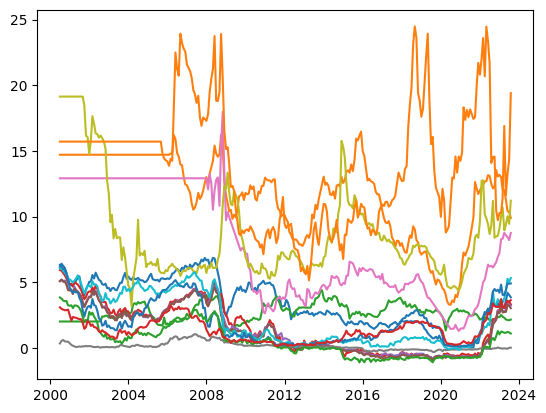

In [12]:
y = df_bonds.loc[np.isin(df_bonds.index, dates)].interpolate()
plt.plot(y)
print(y.shape)

## VIX data

In [4]:
X = pd.DataFrame(index = dates)
X.shape

(284, 0)

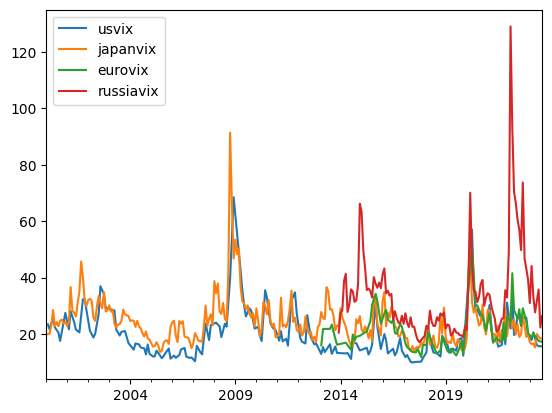

In [5]:
vixs = pd.read_pickle('yc/' + 'vixs' + ".pkl")
vixs = vixs.loc[np.isin(vixs.index, dates)]
vixs.plot()


X = pd.merge(X, vixs, right_index = True, left_index = True, how = 'left')


## Index data

In [6]:
def rem_time(d):
    return datetime.datetime(d.year, d.month, d.day)

<Axes: >

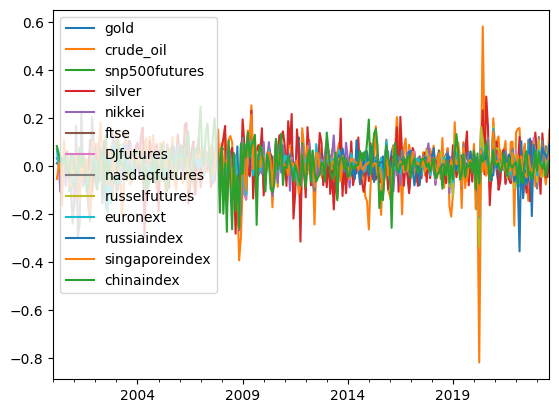

In [7]:
index_data = pd.read_pickle('yc/' + 'various_index' + ".pkl")
index_data = index_data.loc[np.isin(index_data.index, dates)]
index_data = np.log(index_data.pct_change()+1)
X = pd.merge(X, index_data, right_index = True, left_index = True, how = 'left')

index_data.plot()

## Currency data

In [8]:


start_date= "2000-01-01"
end_date="2023-08-01"
dates_tmp=pd.date_range(start_date, end_date, freq='d')
date_df= pd.DataFrame(index = dates_tmp)



currencies = pd.read_pickle('yc/' + 'currencies' + ".pkl")
currencies.index = [rem_time(d) for d in currencies.index]
currencies = pd.merge(date_df, currencies['Adj Close'], right_index = True, left_index = True, how = 'left')

currencies = currencies.interpolate()

currencies = currencies.loc[np.isin(currencies.index, dates)]
currencies = np.log(currencies.pct_change()+1)
X = pd.merge(X, currencies, right_index = True, left_index = True, how = 'left')

## CPI

In [9]:
cpi_data = pd.read_pickle('yc/' + 'cpi_data' + ".pkl")

countries = ['Australia', 'Brazil', 'China', 'Denmark', 'France', 'Germany', 'Iceland', 'Japan', 'Russia', 'United Kingdon', 'United States', 'Tu']

bools = [any([s in col for s in countries]) for col in  cpi_data.columns]
cpi_data = cpi_data.loc[:,bools]
cpi_data = cpi_data.loc[np.isin(cpi_data.index, dates)]
cpi_data = cpi_data.pct_change()

X = pd.merge(X, cpi_data, right_index = True, left_index = True, how = 'left')


# Let's start by filtering out, and use data from 2011

In [10]:
def calc_shapley_value(B,X=None, Sigma = None):
    if Sigma is None:
        Sigma = np.cov(X.T)
    
    r = Sigma.shape[0]
    val_y = np.dot(B, Sigma).dot(B.T)

    d = val_y.shape[0]
    shapleys = np.zeros((int(d*(d+1)/2), r))
    index = np.arange(r)


    cnt=0
    shap_matrix = np.zeros((r,d,d))
    for i in range(d):
        for j in range(i,d):
            for k in range(r):
                t1 = B[i,k]*B[j,k]*Sigma[k,k]
                t2 = 0.5*np.sum(B[i,index != k]*B[j,k]*Sigma[k,index != k])
                t3 = 0.5*np.sum(B[j,index != k]*B[i,k]*Sigma[k,index != k])
                shapleys[cnt,k] = t1+t2+t3
                shap_matrix[k,i,j] = t1+t2+t3
            cnt+=1

    for k in range(r):
        shap_matrix[k] = shap_matrix[k]+shap_matrix[k].T -np.diag(shap_matrix[k])

    return shapleys, shap_matrix

In [14]:
y_2011 = y.iloc[(y.index >= datetime.datetime(2011,1,1)) & (y.index <= datetime.datetime(2022,10,1))]
X_2011 = X.iloc[(X.index >= datetime.datetime(2011,1,1)) & (X.index <= datetime.datetime(2022,10,1))]
X_2011 = X_2011.dropna(axis = 1 ) 

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_static = scaler.fit_transform(X_2011)
r = X_static.shape[1]

In [17]:
import sys
sys.path.insert(0, 'C:/Users/ragna/Documents/Code/DyGraph')
sys.path.insert(0, 'C:/Users/ragna/Documents/Code/DyGraph/src')
import CovReg as cr

In [279]:
liks = np.zeros(20)
nr_params = np.zeros(20)

for a_idx, alpha in enumerate(np.linspace(0, 0.1, 20)):
    cov = cr.CovReg( Y = np.array(y_2011), alpha = alpha, max_iter = 100, tol = 1e-3, psi =0.1*np.identity(r))
    cov.fit_hoff_b_only(X2 = X_static)
    liks[a_idx], nr_params[a_idx] = cov.marg_lik(X2 = X_static)


Error 7.72E-4:  39%|███▉      | 39/100 [00:08<00:13,  4.36it/s]


In [28]:
cov = cr.CovReg( Y = np.array(y_2011), alpha = 0.0001, max_iter = 100, tol = 1e-3)
cov.fit_hoff_b_only(X2 = X_static, psi =0.1*np.identity(y_2011.shape[1]))
cov.marg_lik(X2 = X_static)

Error 1.47E-3: 100%|██████████| 100/100 [00:47<00:00,  2.13it/s]


(894.2648507018243, 1250)

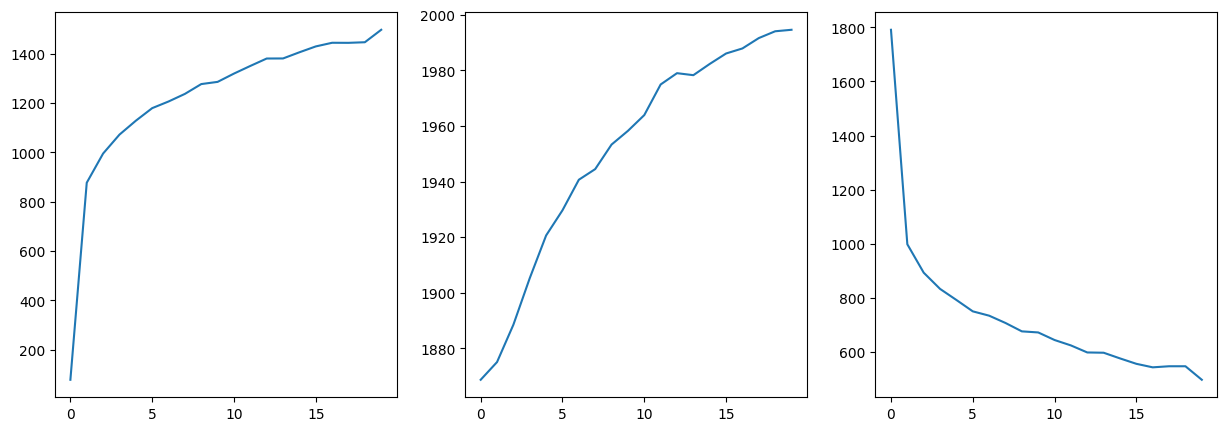

In [285]:
fig, ax = plt.subplots(1,3, figsize = (15, 5))

ax[0].plot(liks - nr_params)
ax[1].plot(liks)
ax[2].plot(nr_params)

In [277]:
cov.marg_lik(X2 = X_static)

(1868.74011634628, 1791)

In [250]:
Shap, Shap_matrix = calc_shapley_value(cov.B,X = X_static)

In [269]:
shap_trace = np.zeros(r)
for k in range(r):
    shap_trace[k] = np.sum(np.diag(Shap_matrix[k]))


In [260]:
X_2011.columns[np.argmax(shap_trace)]

'hcpi_qGermany'

In [261]:
X_2011.columns[np.argmin(shap_trace)]

'def_qMacao SAR, China'

In [270]:
X_2011.columns[(shap_trace<0.1) & (shap_trace>-0.1)]

Index(['chinaindex', 'CHFAUD=X', 'CHFTRY=X', 'EURCHF=X', 'EURGBP=X',
       'EURUSD=X', 'GBPCHF=X', 'GBPDKK=X', 'GBPSGD=X', 'USDCHF=X', 'USDDKK=X',
       'USDGBP=X', 'USDISK=X', 'ecpi_qRussian Federation', 'fcpi_qChina',
       'def_qTaiwan, China'],
      dtype='object')